In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the data from https://raw.githubusercontent.com/gziz/cei-ds/main/data/raw/aire_06_06_22.csv?token=GHSAT0AAAAAABV45OK4NME4K6KBZNPUBQ6IYV6G63A
data_raw = pd.read_csv('DataJuarez/aire_06_06_22.csv')

In [3]:
input_CSV = ['CO','NO2','PM10','PM25','SO2','O3']
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Importar datos
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image


In [5]:
# poner la descripcion de los datos
data_raw.describe()

,Unnamed: 0,Registros_id,PM10,PM25,O3,CO,NO2,SO2,TEMPERATURA,HUMEDAD
count,624525.000000,6.245250e+05,575906.000000,446875.000000,327163.000000,397361.000000,269477.000000,360346.000000,36771.000000,36771.000000
mean,312262.000000,1.629609e+06,56.492472,20.004067,0.025626,1.174574,0.012397,0.005734,21.718822,50.343144
std,180284.982769,4.446380e+05,58.898960,113.251339,0.068198,44.880535,0.062048,0.066888,52.963419,78.066704
min,0.000000,6.055000e+03,-9999.000000,-9999.000000,-9.999000,-9999.000000,-9.999000,-9.999000,-9999.000000,-9999.000000
25%,156131.000000,1.623247e+06,32.000000,11.000000,0.011400,0.660000,0.005200,0.003000,16.480000,33.000000
50%,312262.000000,1.779378e+06,48.000000,17.830000,0.022300,1.180000,0.009300,0.004700,23.190000,52.000000
75%,468393.000000,1.935549e+06,70.000000,27.370000,0.036000,1.950000,0.017000,0.007800,27.900000,72.000000
max,624524.000000,2.095394e+06,1001.000000,825.440000,0.476700,38.000000,0.197000,0.295100,43.700000,101.000000


In [6]:
# contar los valores por cada sensor_id
data_raw.groupby('Sensor_id').count()

,Unnamed: 0,Registros_id,Dia,PM10,PM25,O3,CO,NO2,SO2,TEMPERATURA,HUMEDAD
Sensor_id,,,,,,,,,,,
ANL1,33991,33991,33991,31805,28593,31781,26138,9145,27831,2626,2626
ANL10,33991,33991,33991,31844,26165,10146,22778,9401,11623,2626,2626
ANL11,33991,33991,33991,32150,18814,11855,17520,12280,23723,2626,2626
ANL12,33991,33991,33991,31943,25787,27547,23298,25045,19507,2626,2626
ANL13,33992,33992,33992,31559,21817,11518,11343,12004,19259,2626,2626
ANL15,9902,9902,9902,9156,37,9299,9134,9298,9316,2626,2626
ANL2,33998,33998,33998,32711,26357,21372,16062,9770,26330,2633,2633
ANL3,33991,33991,33991,32178,26637,22987,23561,16213,26060,2626,2626
ANL4,33991,33991,33991,31994,25087,32738,25937,27527,27588,2626,2626


In [7]:
def clean_data(data):
    # Eliminar la columan llamada 'Unnamed: 0'
    data = data.drop(['Unnamed: 0'], axis=1)
    # Eliminar las columnas que sean solo NaN
    for col in input_CSV:
        data.drop(data[data[col] <= 0].index, inplace=True)
    return data

In [8]:
data = clean_data(data_raw)
# agarrar solo los datos de la Sensor_id S6 y S7
data_S6 = data[data['Sensor_id'].isin(['ANL4'])]
# order by sensor_id
data_S6 = data_S6.sort_values(by=['Sensor_id'])
#borrar las filas que no tengan O3
data_S6 = data_S6[data_S6['O3'] > 0]
#borrar las filas que no tengan PM10
data_S6 = data_S6[data_S6['PM10'] > 0]
#borrar las filas que no tengan PM25
data_S6 = data_S6[data_S6['PM25'] > 0]
#borrar las filas que no tengan SO2
data_S6 = data_S6[data_S6['SO2'] > 0]
#borrar las filas que no tengan NO2
data_S6 = data_S6[data_S6['NO2'] > 0]
# quitar la columna de Dia
data_S6 = data_S6.drop(['Dia'], axis=1)
# quitar la columna de Registros_id
data_S6 = data_S6.drop(['Registros_id'], axis=1)
# quitar Sensor_id
data_S6 = data_S6.drop(['Sensor_id'], axis=1)
# quitar HUMEDAD
#data_S6 = data_S6.drop(['HUMEDAD'], axis=1)
# quitar TEMPERATURA
#data_S6 = data_S6.drop(['TEMPERATURA'], axis=1)
# convertir nans en 0
data_S6 = data_S6.fillna(0)

In [9]:
# contar la cantidad de datos que hay por cada Sensor_id
data_S6.describe()
data_S6.head()

,PM10,PM25,O3,CO,NO2,SO2,TEMPERATURA,HUMEDAD
2,80.0,11.0,0.045,0.45,0.0090,0.0031,0.0,0.0
411133,43.0,23.0,0.005,0.00,0.0132,0.0049,0.0,0.0
411132,35.0,21.0,0.008,0.00,0.0135,0.0046,0.0,0.0
411131,31.0,6.0,0.011,0.00,0.0142,0.0046,0.0,0.0
411130,48.0,7.0,0.018,0.00,0.0130,0.0047,0.0,0.0


In [10]:
# convertir los datos a numpy
data_S6_numpy = data_S6.to_numpy()

In [11]:
# importar la libreria para separar en train y test
from sklearn.model_selection import train_test_split

In [12]:
# Hacer los valores de salida y entrada
# El valor respuesta es el siguiente dato
X_data = data_S6_numpy[:-1,:]
y_data = data_S6_numpy[1:,:]
# estandarizar los datos
#"""
X_data = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
y_data = (y_data - y_data.mean(axis=0)) / y_data.std(axis=0)
#"""
# separar los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
# convertir los datos a tensor
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

In [13]:
# print the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([13228, 8])
torch.Size([3308, 8])
torch.Size([13228, 8])
torch.Size([3308, 8])


In [14]:
print(data_S6.head(10))
X_train[0:10]

        PM10  PM25     O3    CO     NO2     SO2  TEMPERATURA  HUMEDAD
2       80.0  11.0  0.045  0.45  0.0090  0.0031          0.0      0.0
411133  43.0  23.0  0.005  0.00  0.0132  0.0049          0.0      0.0
411132  35.0  21.0  0.008  0.00  0.0135  0.0046          0.0      0.0
411131  31.0   6.0  0.011  0.00  0.0142  0.0046          0.0      0.0
411130  48.0   7.0  0.018  0.00  0.0130  0.0047          0.0      0.0
411129  52.0   4.0  0.019  0.00  0.0135  0.0050          0.0      0.0
411128  78.0  25.0  0.023  0.00  0.0125  0.0057          0.0      0.0
411127  98.0  29.0  0.021  0.00  0.0124  0.0067          0.0      0.0
411126  92.0  38.0  0.008  0.00  0.0144  0.0071          0.0      0.0
411125  55.0  15.0  0.007  0.00  0.0120  0.0072          0.0      0.0


tensor([[ 0.3780, -0.6560,  0.7861, -0.7713, -0.6408, -0.4113, -0.3940, -0.3823],
        [-0.5537,  0.3727, -1.1059, -1.3533, -0.1987,  0.2126, -0.3940, -0.3823],
        [-0.7552,  0.2012, -0.9640, -1.3533, -0.1671,  0.1086, -0.3940, -0.3823],
        [-0.8559, -1.0846, -0.8221, -1.3533, -0.0935,  0.1086, -0.3940, -0.3823],
        [-0.4278, -0.9989, -0.4910, -1.3533, -0.2198,  0.1433, -0.3940, -0.3823],
        [-0.3271, -1.2561, -0.4437, -1.3533, -0.1671,  0.2472, -0.3940, -0.3823],
        [ 0.3276,  0.5441, -0.2545, -1.3533, -0.2724,  0.4898, -0.3940, -0.3823],
        [ 0.8312,  0.8870, -0.3491, -1.3533, -0.2829,  0.8364, -0.3940, -0.3823],
        [ 0.6802,  1.6586, -0.9640, -1.3533, -0.0724,  0.9751, -0.3940, -0.3823],
        [-0.2516, -0.3131, -1.0113, -1.3533, -0.3250,  1.0097, -0.3940, -0.3823]],
       device='cuda:0')

In [15]:
# crear el modelo
# La entrada son los datos numericos y la salida la prediccion de la siguiente hora de esos datos
# usa un modelo recurrente 
from audioop import bias


class O3Predictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,device):
        super(O3Predictor, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.device = device
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True,bias=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        #self.fc3 = nn.Linear(hidden_size, output_size)
    def forward(self, x, h):
        # convert x to device
        x, (h, c) = self.lstm(x, h)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        #x = F.leaky_relu(x)
        #x = self.fc3(x)
        return x, (h, c)
    def init_hidden(self, batch_size):
        # set the batch_first to True
        # Xavier initialization to initialize the hidden state
        h = torch.zeros(1, batch_size, self.hidden_size).to(self.device)
        c = torch.zeros(1, batch_size, self.hidden_size).to(self.device)
        h = torch.nn.init.xavier_normal_(h)
        c = torch.nn.init.xavier_normal_(c)
        # initialize the hidden state
        return (h, c)


In [16]:
# parametros del modelo
Val_loss = []
Trn_loss = []
LSTM_params = {'input_size': X_train.shape[1],
                'hidden_size': 64,
                'output_size': y_train.shape[1],
                'device': device}
O3Pred = O3Predictor(**LSTM_params).to(device)
# funcion de perdida
criterion = nn.MSELoss()

In [17]:
# load the model weights
O3Pred.load_state_dict(torch.load('Model/O3Pred.pt'))

<All keys matched successfully>

In [18]:
from math import gamma


EPOCHS = 1000
Learning_rate = 0.001
Batch_size = 512
clip = 0.9
# crear el optimizador
optimizer = torch.optim.AdamW(O3Pred.parameters(), lr=Learning_rate)
# scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10,factor=0.5)

In [19]:
def plot_model(model, X_test, y_test, O3Only=False):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1)
        print(hidden[0].shape)
        print(X_test.shape)
        output, hidden = model(X_test.unsqueeze(0), hidden)
        loss = criterion(output, y_test)
        print('Test Loss: {:.6f}'.format(loss.item()))
        print(output.shape)
        print(y_test.shape)
        # mostrar con transparencia el resultado
        if O3Only:
            for i in range(y_test.shape[1]):
                plt.plot(y_test.detach().cpu().numpy()[:,i], label='Ground Truth', alpha = 0.9)
                plt.plot(output.detach().cpu().numpy()[0,:,i], label='Prediction', alpha = 0.4)
                plt.legend()
                plt.show()
        else:
            plt.plot(y_test.detach().cpu().numpy()[:,2], label='Ground Truth', alpha = 0.9)
            plt.plot(output.detach().cpu().numpy()[0,:,2], label='Prediction', alpha = 0.4)
            plt.legend()
            plt.show()
            

In [242]:
# entrenar el modelo
from re import T


for epoch in range(EPOCHS):
    O3Pred.train()
    # pasar los datos a la GPU
    for i in range(0, X_train.shape[0]-Batch_size, Batch_size):
        # crear una batch de datos
        X_batch = X_train[i:i+Batch_size].unsqueeze(1)
        y_batch = y_train[i:i+Batch_size].unsqueeze(1)
        # inicializar el modelo
        h = O3Pred.init_hidden(Batch_size)
        # introducir los datos en el modelo
        output, h = O3Pred(X_batch, h)
        # calcular la perdida
        loss = criterion(output, y_batch)
        # limpiar los gradientes
        optimizer.zero_grad()
        # calcular los gradientes
        loss.backward()
        # clipar los gradientes
        nn.utils.clip_grad_norm_(O3Pred.parameters(), clip)
        # actualizar los pesos
        optimizer.step()
    
    # mostrar el resultado del train set y validation set
    if (epoch+1) % 30 == 0:
        with torch.no_grad():
            # crear una batch de datos
            X_batch = X_train[0:Batch_size*4].unsqueeze(1)
            y_batch = y_train[0:Batch_size*4].unsqueeze(1)
            # inicializar el modelo
            h = O3Pred.init_hidden(Batch_size*4)
            # introducir los datos en el modelo
            output, h = O3Pred(X_batch, h)
            # calcular la perdida
            loss = criterion(output, y_batch)
            Trn_loss.append(loss.item())
            # mostrar el resultado
            print('Epoch: {}/{}, Training Loss: {:.6f}'.format(epoch+1, EPOCHS, loss.item()))
            # crear una batch de datos
            X_batch = X_test[0:Batch_size*4].unsqueeze(1)
            y_batch = y_test[0:Batch_size*4].unsqueeze(1)
            # inicializar el modelo
            h = O3Pred.init_hidden(Batch_size*4)
            # introducir los datos en el modelo
            output, h = O3Pred(X_batch, h)
            # calcular la perdida
            loss = criterion(output, y_batch)
            Val_loss.append(loss.item())
            # scheduler
            scheduler.step(loss)
            # mostrar el resultado
            print('Epoch: {}/{}, Validation Loss: {:.6f}'.format(epoch+1, EPOCHS, loss.item()))

Epoch: 30/1000, Training Loss: 0.299188
Epoch: 30/1000, Validation Loss: 0.281894


KeyboardInterrupt: 

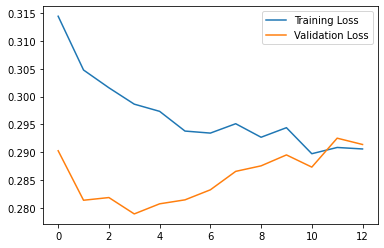

In [229]:
# graficar el resultado
plt.plot(Trn_loss, label='Training Loss')
plt.plot(Val_loss, label='Validation Loss')
plt.legend()

torch.Size([1, 1, 64])
torch.Size([100, 8])
Test Loss: 0.380469
torch.Size([1, 100, 8])
torch.Size([100, 8])


c:\Users\Felipe de Jesus\miniconda3\envs\FLearn\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([100, 8])) that is different to the input size (torch.Size([1, 100, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


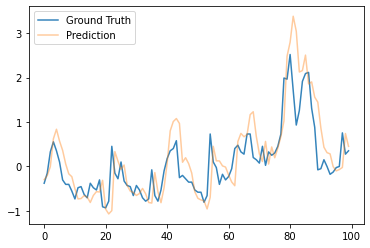

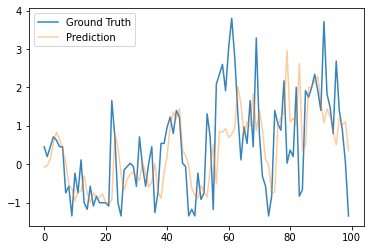

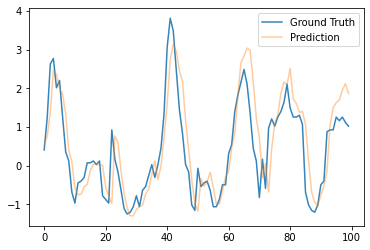

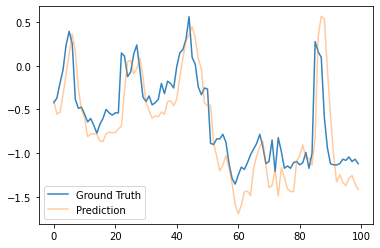

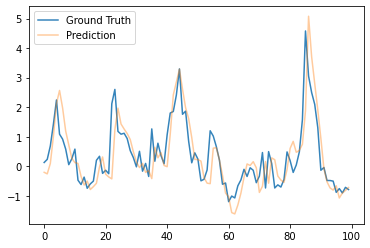

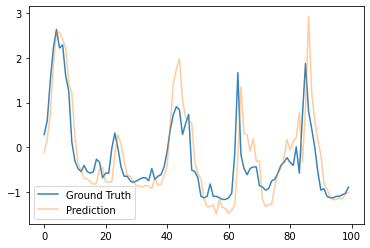

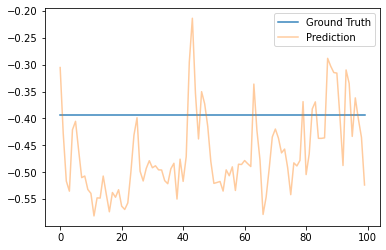

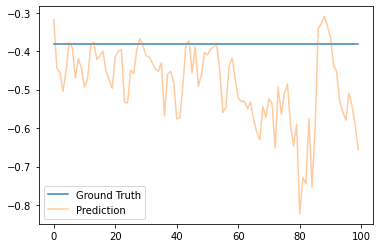

In [20]:
plot_model(O3Pred, X_test[0:100], y_test[0:100], O3Only=True)

In [233]:
# salvar el modelo
torch.save(O3Pred.state_dict(), 'Model/O3Pred.pt')

In [56]:
# predict_n
def predict_n(model, X_test, y_test, n, m):
    restults = []
    ground_truth = []
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1)
        output, hidden = model(X_test[0:m].unsqueeze(0), hidden)
        # empezar a evaluar con el output como input
        for i in range(m, m+n):
            output, hidden = model(output, hidden)
            # mostrar el resultado
            print('Prediction: {:.6f}'.format(output.detach().cpu().numpy()[0,0,2]))
            print('Ground Truth: {:.6f}'.format(y_test[i,2]))
            restults.append(output.detach().cpu().numpy()[0,0,2].item())
            ground_truth.append(y_test[i,2].item())
        # mostrar el resultado
    return (restults, ground_truth)

In [59]:
(pred, out) = predict_n(O3Pred, X_test, y_test, 100, 700)

Prediction: 1.127644
Ground Truth: 0.597012
Prediction: 1.881436
Ground Truth: -0.821981
Prediction: 2.504281
Ground Truth: -0.774682
Prediction: 2.788756
Ground Truth: -0.443583
Prediction: 2.472891
Ground Truth: 0.928110
Prediction: 1.244973
Ground Truth: 1.164609
Prediction: 0.076776
Ground Truth: 1.590307
Prediction: -0.100103
Ground Truth: 1.779506
Prediction: -0.101330
Ground Truth: 2.157904
Prediction: -0.120561
Ground Truth: 2.347103
Prediction: -0.629725
Ground Truth: 2.772801
Prediction: -0.963413
Ground Truth: -0.065185
Prediction: -1.127521
Ground Truth: 2.252504
Prediction: -1.200496
Ground Truth: 0.455112
Prediction: -1.232317
Ground Truth: -0.159785
Prediction: -1.260737
Ground Truth: -0.727382
Prediction: -1.345134
Ground Truth: -0.963881
Prediction: -1.362704
Ground Truth: -0.916581
Prediction: -1.307945
Ground Truth: -0.443583
Prediction: -1.137109
Ground Truth: -0.727382
Prediction: -0.901378
Ground Truth: -0.680082
Prediction: -0.670027
Ground Truth: -0.916581
Predi

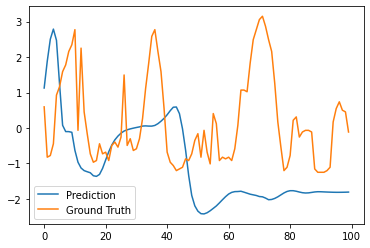

In [60]:
# plot pred y out
plt.plot(pred, label='Prediction')
plt.plot(out, label='Ground Truth')
plt.legend()
plt.show()